In [1]:
# Load the required dependencies
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor

from scipy import stats
from scipy.stats import linregress
from scipy.stats import f_oneway

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError


from pandas.plotting import scatter_matrix

pd.set_option('display.max_columns', 150, 'display.max_rows', 255)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read in the File and preview it.
file_path = Path("secondary_housing_data.csv")
df = pd.read_csv(file_path)
df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Neighborhood,Age,SalePrice
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,CollgCr,5,208500
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,Veenker,31,181500
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,CollgCr,7,223500
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,Crawfor,91,140000
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,NoRidge,8,250000


In [3]:
df["LotArea"].describe()

count     1,460.00
mean     10,516.83
std       9,981.26
min       1,300.00
25%       7,553.50
50%       9,478.50
75%      11,601.50
max     215,245.00
Name: LotArea, dtype: float64

In [4]:
# Set list of columns to keep for analysis
housing_df = df.copy()
housing_df.head()

,MSSubClass,LotArea,OverallCond,Exterior1st,TotalBsmtSF,CentralAir,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageArea,Neighborhood,Age,SalePrice
0,60,8450,5,VinylSd,856,Y,1710,2,1,3,1,8,548,CollgCr,5,208500
1,20,9600,8,MetalSd,1262,Y,1262,2,0,3,1,6,460,Veenker,31,181500
2,60,11250,5,VinylSd,920,Y,1786,2,1,3,1,6,608,CollgCr,7,223500
3,70,9550,5,Wd Sdng,756,Y,1717,1,0,3,1,7,642,Crawfor,91,140000
4,60,14260,5,VinylSd,1145,Y,2198,2,1,4,1,9,836,NoRidge,8,250000


In [5]:
# Home prices by the year Sold
housing_df.groupby(['Age']).agg({'SalePrice':['mean','median','std','min', 'max', 'count']}).head()


SalePrice                                            
          mean     median        std     min     max count
Age                                                       
0   264,302.23 243,289.00  83,322.06   84500  465000    64
1   266,914.00 235,064.00 108,857.14  140000  611657   100
2   223,247.85 203,000.00  67,825.64  130000  378500    39
3   253,159.72 245,500.00  69,556.34  148000  377500    36
4   199,063.41 192,500.00  42,747.69  131500  312500    41

In [6]:
# # Define the bin edges and labels for 'LotArea'
# bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, float('inf')]
# labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000+', '15000+']

# # Create a new column 'LotAreaBin' with the binned values
# housing_df['LotAreaBin'] = pd.cut(housing_df['LotArea'], bins=bins, labels=labels)

# # Encode 'LotAreaBin' into numeric values for the scatter plot
# housing_df['LotAreaCode'] = pd.Categorical(housing_df['LotAreaBin']).codes

# # Sort the values based on 'LotAreaCode' to maintain the order in the plot
# housing_df['LotAreaCode'].sort_values(ascending=False)

# # Scatter plot
# plt.scatter(housing_df['LotAreaCode'], housing_df['SalePrice'], c="blue", linewidths=1, marker="o", edgecolor="red", s=9)
# plt.title('Home Prices vs Lot Size')
# plt.ylabel('Home Price')
# plt.xlabel('Lot Size (Binned)')
# plt.xticks(ticks=housing_df['LotAreaCode'].unique(), labels=labels, rotation=45)

# # Compute and print the correlation
# correlation = stats.pearsonr(housing_df['LotAreaCode'], housing_df['SalePrice'])
# print(f"The correlation is: {correlation[0]}")

# plt.show()


The correlation is: 0.42281990678759784


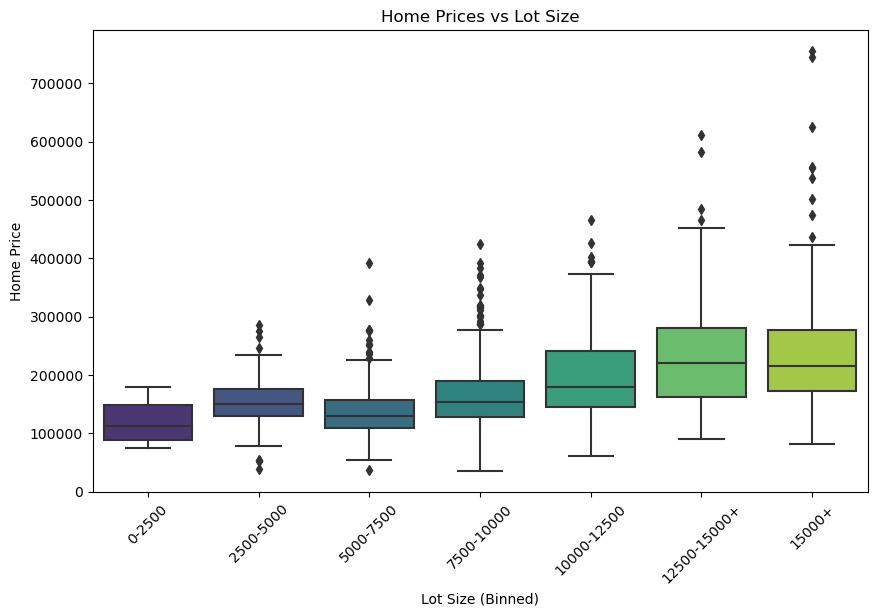

In [7]:
# Define the bin edges and labels for 'LotArea'
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, float('inf')]
labels = ['0-2500', '2500-5000', '5000-7500', '7500-10000', '10000-12500', '12500-15000+', '15000+']

# Create a new column 'LotAreaBin' with the binned values
housing_df['LotAreaBin'] = pd.cut(housing_df['LotArea'], bins=bins, labels=labels)

# Sort the values based on 'LotAreaCode' to maintain the order in the plot
housing_df['LotAreaCode'] = pd.Categorical(housing_df['LotAreaBin']).codes
housing_df['LotAreaCode'].sort_values(ascending=False)


# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotAreaBin', y="SalePrice", data=housing_df, palette='viridis')
plt.title('Home Prices vs Lot Size')
plt.xlabel('Lot Size (Binned)')
plt.ylabel('Home Price')

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['LotAreaCode'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

plt.xticks(rotation=45)
plt.show()


In [8]:
# Home prices by the year Sold
housing_df.groupby(['BedroomAbvGr']).agg({'SalePrice':['mean','median','std','min', 'max']})

SalePrice                                      
                   mean     median        std     min     max
BedroomAbvGr                                                 
0            221,493.17 202,500.00 106,675.89  108959  385000
1            173,162.42 145,250.00 102,975.07   35311  501837
2            158,197.66 137,250.00  78,197.11   34900  611657
3            181,056.87 169,945.00  63,793.92   40000  451950
4            220,421.25 193,500.00 109,510.52   64500  755000
5            180,819.05 161,500.00  68,472.48   81000  320000
6            143,779.00 141,000.00  26,455.38  119000  200000
8            200,000.00 200,000.00        NaN  200000  200000

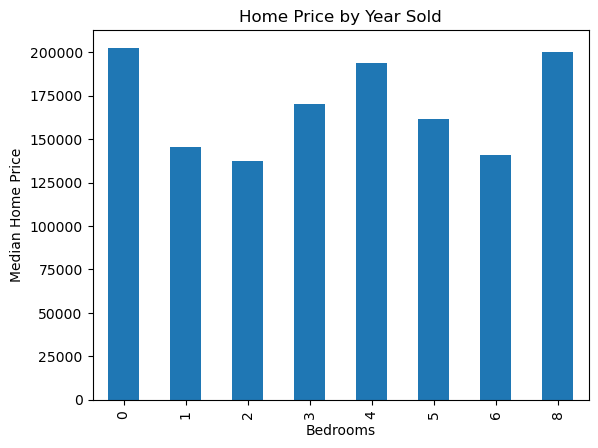

The correlation is: 0.16821315430073996


In [9]:
# Median Home Price by year it was sold
bedroom = housing_df.groupby(['BedroomAbvGr'])
group0 = bedroom['SalePrice'].median()
price_chart0 = group0.plot(kind='bar', title ='Home Price by Year Sold').invert_xaxis()
plt.gca().invert_xaxis()

plt.xlabel('Bedrooms')
plt.ylabel('Median Home Price')
plt.show()

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['BedroomAbvGr'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

In [10]:
# Home prices by Overall Condition
housing_df.groupby(['OverallCond']).agg({'SalePrice':['mean','median','var','std','min', 'max']})

SalePrice                                                        
                  mean     median               var        std     min     max
OverallCond                                                                   
1            61,000.00  61,000.00               NaN        NaN   61000   61000
2           141,986.40  85,000.00 19,977,790,924.80 141,342.81   67000  394432
3           101,929.40  89,500.00  2,011,745,895.33  44,852.49   35311  200624
4           120,438.44 115,000.00  1,514,963,022.96  38,922.53   40000  235000
5           203,146.91 185,000.00  7,244,958,064.57  85,117.32   34900  745000
6           153,961.59 142,750.00  3,689,100,978.35  60,737.97   37900  755000
7           158,145.49 145,000.00  2,858,847,281.01  53,468.19   79900  402000
8           155,651.74 142,500.00  2,743,155,780.39  52,375.14   84500  335000
9           216,004.55 176,200.00  9,309,543,311.69  96,485.97  110500  475000

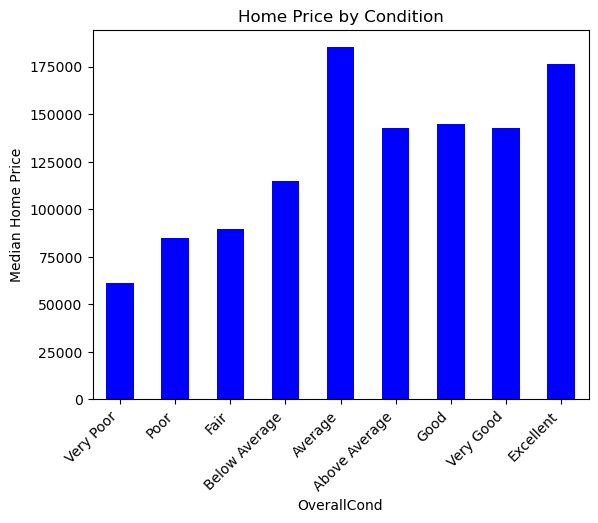

In [21]:
# Median Home Price by the overall condtion rating of the home
# Define the condition rating labels
condition_labels = ['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average', 'Good', 'Very Good', 'Excellent']
hse = housing_df.groupby(['OverallCond'])
group1 = hse['SalePrice'].median()
price_chart1 = group1.plot(kind='bar', title='Home Price by Condition', color='blue')
plt.xticks(range(len(condition_labels)), condition_labels, rotation=45, ha='right')
plt.ylabel('Median Home Price')
plt.show()

In [ ]:
# # Boxplot of the Price by Condtion ratiing
# housing_df.boxplot(column = "SalePrice", by = "OverallCond", grid = False)
# plt.xticks(rotation=90)
# plt.title(" ")
# plt.ylabel("Price")
# plt.show()

# # Compute and print the correlation (optional)
# correlation = stats.pearsonr(housing_df['OverallCond'], housing_df['SalePrice'])
# print(f"The correlation is: {correlation[0]}")

In [ ]:
# Home prices by Neighborhood
housing_df.groupby(['GrLivArea']).agg({'SalePrice':['mean','median','std','min', 'max']})

In [ ]:
# # Median Home Price by Neighborhood 
# grp = housing_df.groupby(['GrLivArea'])
# group = grp['SalePrice'].median().sort_values(ascending=False)
# price_chart = group.plot(kind='bar', title ='Home Price by Neighborhood')
# plt.ylabel('Median Home Price')
# plt.show()

In [ ]:
# Define the bin edges and labels for 'GrLivArea'
bins = [0, 1000, 1500, 2000, 2500, 3000, float('inf')]
labels = ['0-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000+']

# Create a new column 'GrLivAreaBin' with the binned values
housing_df['GrLivAreaBin'] = pd.cut(housing_df['GrLivArea'], bins=bins, labels=labels)

# Group by 'GrLivAreaBin' and calculate the median home price for each bin
grp = housing_df.groupby(['GrLivAreaBin'])
group = grp['SalePrice'].median()

# Plot the median home prices by bin
price_chart = group.plot(kind='bar', title='Median Home Price by GrLivArea Range')
plt.xlabel('Gross Living Area sqft')
plt.ylabel('Median Home Price')
plt.xticks(rotation=45)
plt.show()

# Compute and print the correlation (optional)
correlation = stats.pearsonr(housing_df['GrLivArea'], housing_df['SalePrice'])
print(f"The correlation is: {correlation[0]}")

In [ ]:
# # Count missing/null values for each variable
# housing_df.isnull().sum()

In [ ]:
# # Check datatype of variables
# housing_df.info()

In [ ]:
# # Get quick summary of the variables.
# housing_df.describe()

In [ ]:
# Save cleaned dataframe to a cvs
# housing_df.to_csv('housing.csv',index=False)

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(housing_df.corr(),
            cmap = 'YlGnBu',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
# Find correlation between the varaibles and plot a heatmap of the relationships
# plt.figure(figsize=(12, 6))
# mat = housing_df.corr().round(2)
# mask = np.triu(np.ones_like(mat, dtype=bool))
# sns.heatmap(mat, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
# plt.show()

In [ ]:
# Check the kind of relationship between variables
# scatter_matrix(housing_df, alpha = 0.2, figsize = (20, 20), diagonal = 'hist')

In [ ]:
# Run some exploratory plots to find relationships.
plt.hist(housing_df['SalePrice'], bins=80)
plt.show()

In [ ]:
plt.boxplot(housing_df['SalePrice'])
plt.show()

In [ ]:
# plt.matshow(housing_df.corr())
# plt.show()

In [ ]:
housing_df.head()

In [ ]:
# Create a copy of the dataframe to use in neural networks
nn_df = housing_df.copy()
nn_df = nn_df.drop(columns=['Neighborhood',"LotAreaBin","sale_median","GrLivAreaBin","LotAreaCode"])
nn_df.head()

In [ ]:
# nn_df = nn_df.drop(columns='Id', axis=1)
nn_df.columns

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy =  nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
df_dummies = pd.get_dummies(nn_df, columns=dummy)

df_dummies.head()

In [ ]:
# Calculate Z-values
df_dummies['price_scaled'] = np.abs(stats.zscore(df_dummies['SalePrice']))

# Filter out outliers
df_dummies = df_dummies[df_dummies['price_scaled'] <= 2.5]

# Drop the column
df_dummies = df_dummies.drop('price_scaled', axis=1)

In [ ]:
df_dummies.describe()

In [ ]:
plt.hist(df_dummies['SalePrice'], bins=80)
plt.show()

In [ ]:
plt.boxplot(df_dummies['SalePrice'])
plt.show()

In [ ]:
# Split our preprocessed data into our features and target arrays
y = df_dummies['SalePrice'].values
X = df_dummies.drop(['SalePrice'],axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [ ]:
y_train.min()

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_test_scaled[:5]

In [ ]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  25
hidden_nodes_layer2 = 25
hidden_nodes_layer3 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss='mse', optimizer="adam", metrics=['accuracy', rmse])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
y_pred = nn.predict(X_test)
# print(MeanSquaredError(y_test, y_pred).numpy())

# print(f'y_actual: {y_test}, y_pred:{y_pred}')
y_pred[:5]

In [ ]:
# from sklearn.preprocessing import StandardScaler,OneHotEncoder
# sales_cat = nn_df.dtypes[nn_df.dtypes == "object"].index.tolist()
# sales_cat

In [ ]:
# # Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# # Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(nn_df[sales_cat]))

# # Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(sales_cat)
# encode_df.head()

In [ ]:
# model_RFR = RandomForestRegressor(n_estimators=10)
# model_RFR.fit(X_train, Y_train)
# Y_pred = model_RFR.predict(X_valid)
 
# mean_absolute_percentage_error(Y_valid, Y_pred)